<a href="https://colab.research.google.com/github/vk4nubip/nubip-DS-ML/blob/main/Classification_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import

In [1]:
#### Load libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.tree import DecisionTreeClassifier, plot_tree # import Decision Tree Classifier
from sklearn.model_selection import train_test_split # import train_test_split function
from sklearn import metrics # import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder

from sklearn.datasets import load_diabetes
from sklearn.datasets import fetch_openml

import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns

# **Load Datasets**

## Churn_Modeling.csv

In [2]:
url = "https://raw.githubusercontent.com/selva86/datasets/master/Churn_Modelling.csv"
churn_df = pd.read_csv(url)

## OR
#### Loading Data from Google Drive
#from google.colab import drive
#drive.mount('/content/drive')
#churn_df = pd.read_csv("/content/drive/My Drive/Churn_Modelling.csv")

churn_df.rename(columns={'NumOfProducts': 'NumOfProds'}, inplace = True)
churn_df.head(3)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProds,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


# Diabetes.csv

In [3]:
diabetes_df = fetch_openml(data_id=43582, as_frame=True)['frame']
diabetes_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0,0.0
764,2.0,122.0,70.0,27.0,0.0,36.8,0.340,27.0,0.0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0,0.0
766,1.0,126.0,60.0,0.0,0.0,30.1,0.349,47.0,1.0


In [4]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']

diabetes_df.columns = col_names
diabetes_df.head(2)

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0.0


# **Classification**

## **Diabetes**

In [5]:
# Divide given columns into two types of variables dependent (target variable) and independent variables (feature variables).
# In other words, split dataset in features and target variable.
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = diabetes_df[feature_cols] # Features
y = diabetes_df.label         # Target variable

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7705627705627706


**Feature Importances**

In [6]:
importances = pd.Series(clf.feature_importances_, index=X_train.columns)
print("\nFeature Importances:")
print(importances.sort_values(ascending=False))


Feature Importances:
glucose     0.562837
bmi         0.326594
age         0.110569
insulin     0.000000
pregnant    0.000000
bp          0.000000
pedigree    0.000000
dtype: float64


**Classification report**

In [7]:
print("\nClassification report:")
print(classification_report(y_test, y_pred))


Classification report:
              precision    recall  f1-score   support

         0.0       0.80      0.85      0.82       146
         1.0       0.71      0.64      0.67        85

    accuracy                           0.77       231
   macro avg       0.76      0.74      0.75       231
weighted avg       0.77      0.77      0.77       231



**Confusion Matrix**

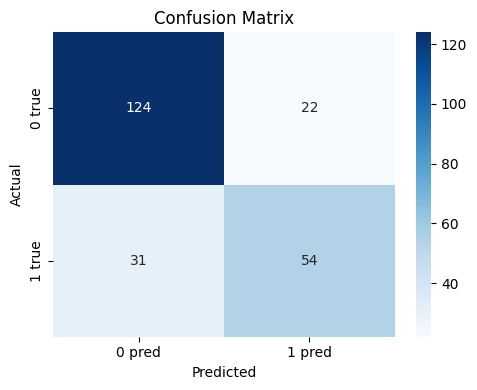

In [8]:
# --- Матриця помилок
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['0 pred', '1 pred'],
            yticklabels=['0 true', '1 true'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

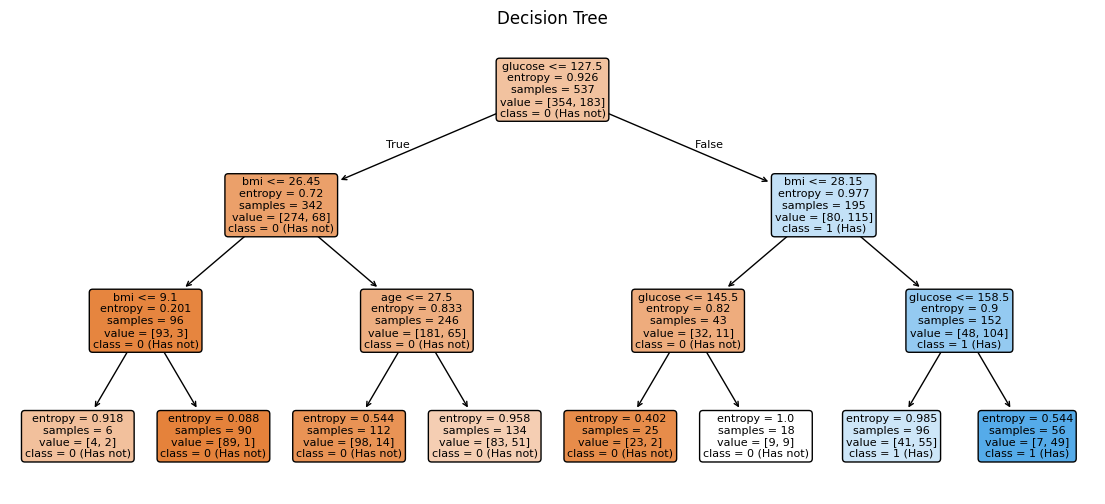

In [9]:
plt.figure(figsize=(14, 6))
plot_tree(clf,
          feature_names=X_train.columns,
          class_names=['0 (Has not)', '1 (Has)'],
          filled=True, rounded=True, fontsize=8)
plt.title("Decision Tree")
plt.show()

## **Churn: Decision Tree**

In [10]:
#### Feature Selection
# Split dataset into dependent (target variable) and independent variables (feature variables)
feature_cols = ['CreditScore', 'Geography', 'Gender', 'Age','Tenure','Balance','NumOfProds', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']
X = churn_df[feature_cols]  # Features
y = churn_df.Exited         # Target variable

In [11]:
#### One-Hot Encoding
categorical_columns = X.select_dtypes(include=['object']).columns.tolist() # Create a one-hot encoder object
encoder = OneHotEncoder(sparse_output=False) # Apply one-hot encoding to the categorical columns
one_hot_encoded = encoder.fit_transform(X[categorical_columns]) # Create a DataFrame with the one-hot encoded columns

# We use get_feature_names_out() to get the column names for the encoded data
one_hot_churn_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_columns)) # Concatenate the one-hot encoded dataframe with the original dataframe

churn_df_encoded = pd.concat([X, one_hot_churn_df], axis=1)
churn_df_encoded.head(3)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProds,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1.0,0.0,0.0,1.0,0.0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0.0,0.0,1.0,1.0,0.0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1.0,0.0,0.0,1.0,0.0


In [12]:
# Drop the original categorical columns
X_encoded_churn = churn_df_encoded.drop(categorical_columns, axis=1)

#### Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X_encoded_churn, y, test_size=0.4, random_state=1) # 60% train and 40% test

#### Building Decision Tree Model
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=4) # Train Decision Tree Classifer
clf = clf.fit(X_train, y_train) # Predict the response for test dataset
y_pred = clf.predict(X_test)

#### Evaluating the Model
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Classification Report: \n", classification_report(y_test, y_pred))


Accuracy: 0.84425
Classification Report: 
               precision    recall  f1-score   support

           0       0.84      0.99      0.91      3159
           1       0.90      0.29      0.44       841

    accuracy                           0.84      4000
   macro avg       0.87      0.64      0.68      4000
weighted avg       0.85      0.84      0.81      4000



In [13]:
# Feature Importances
feature_importance = clf.feature_importances_
feature_names = X_encoded_churn.columns
feature_importances = pd.DataFrame({'feature':feature_names, 'importance':feature_importance})
feature_importances = feature_importances.sort_values('importance', ascending=False)
print(feature_importances)

              feature  importance
1                 Age    0.449575
4          NumOfProds    0.333398
6      IsActiveMember    0.120444
3             Balance    0.049963
9   Geography_Germany    0.031907
7     EstimatedSalary    0.009467
2              Tenure    0.005247
0         CreditScore    0.000000
5           HasCrCard    0.000000
8    Geography_France    0.000000
10    Geography_Spain    0.000000
11      Gender_Female    0.000000
12        Gender_Male    0.000000


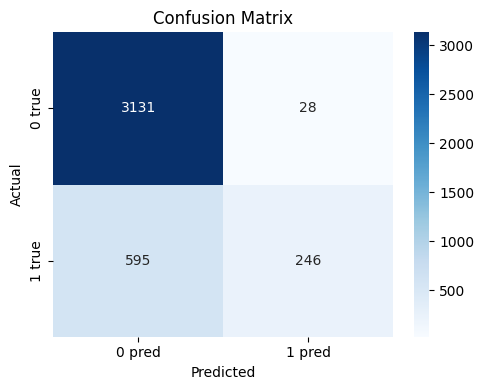

In [14]:
# --- Матриця помилок
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['0 pred', '1 pred'],
            yticklabels=['0 true', '1 true'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

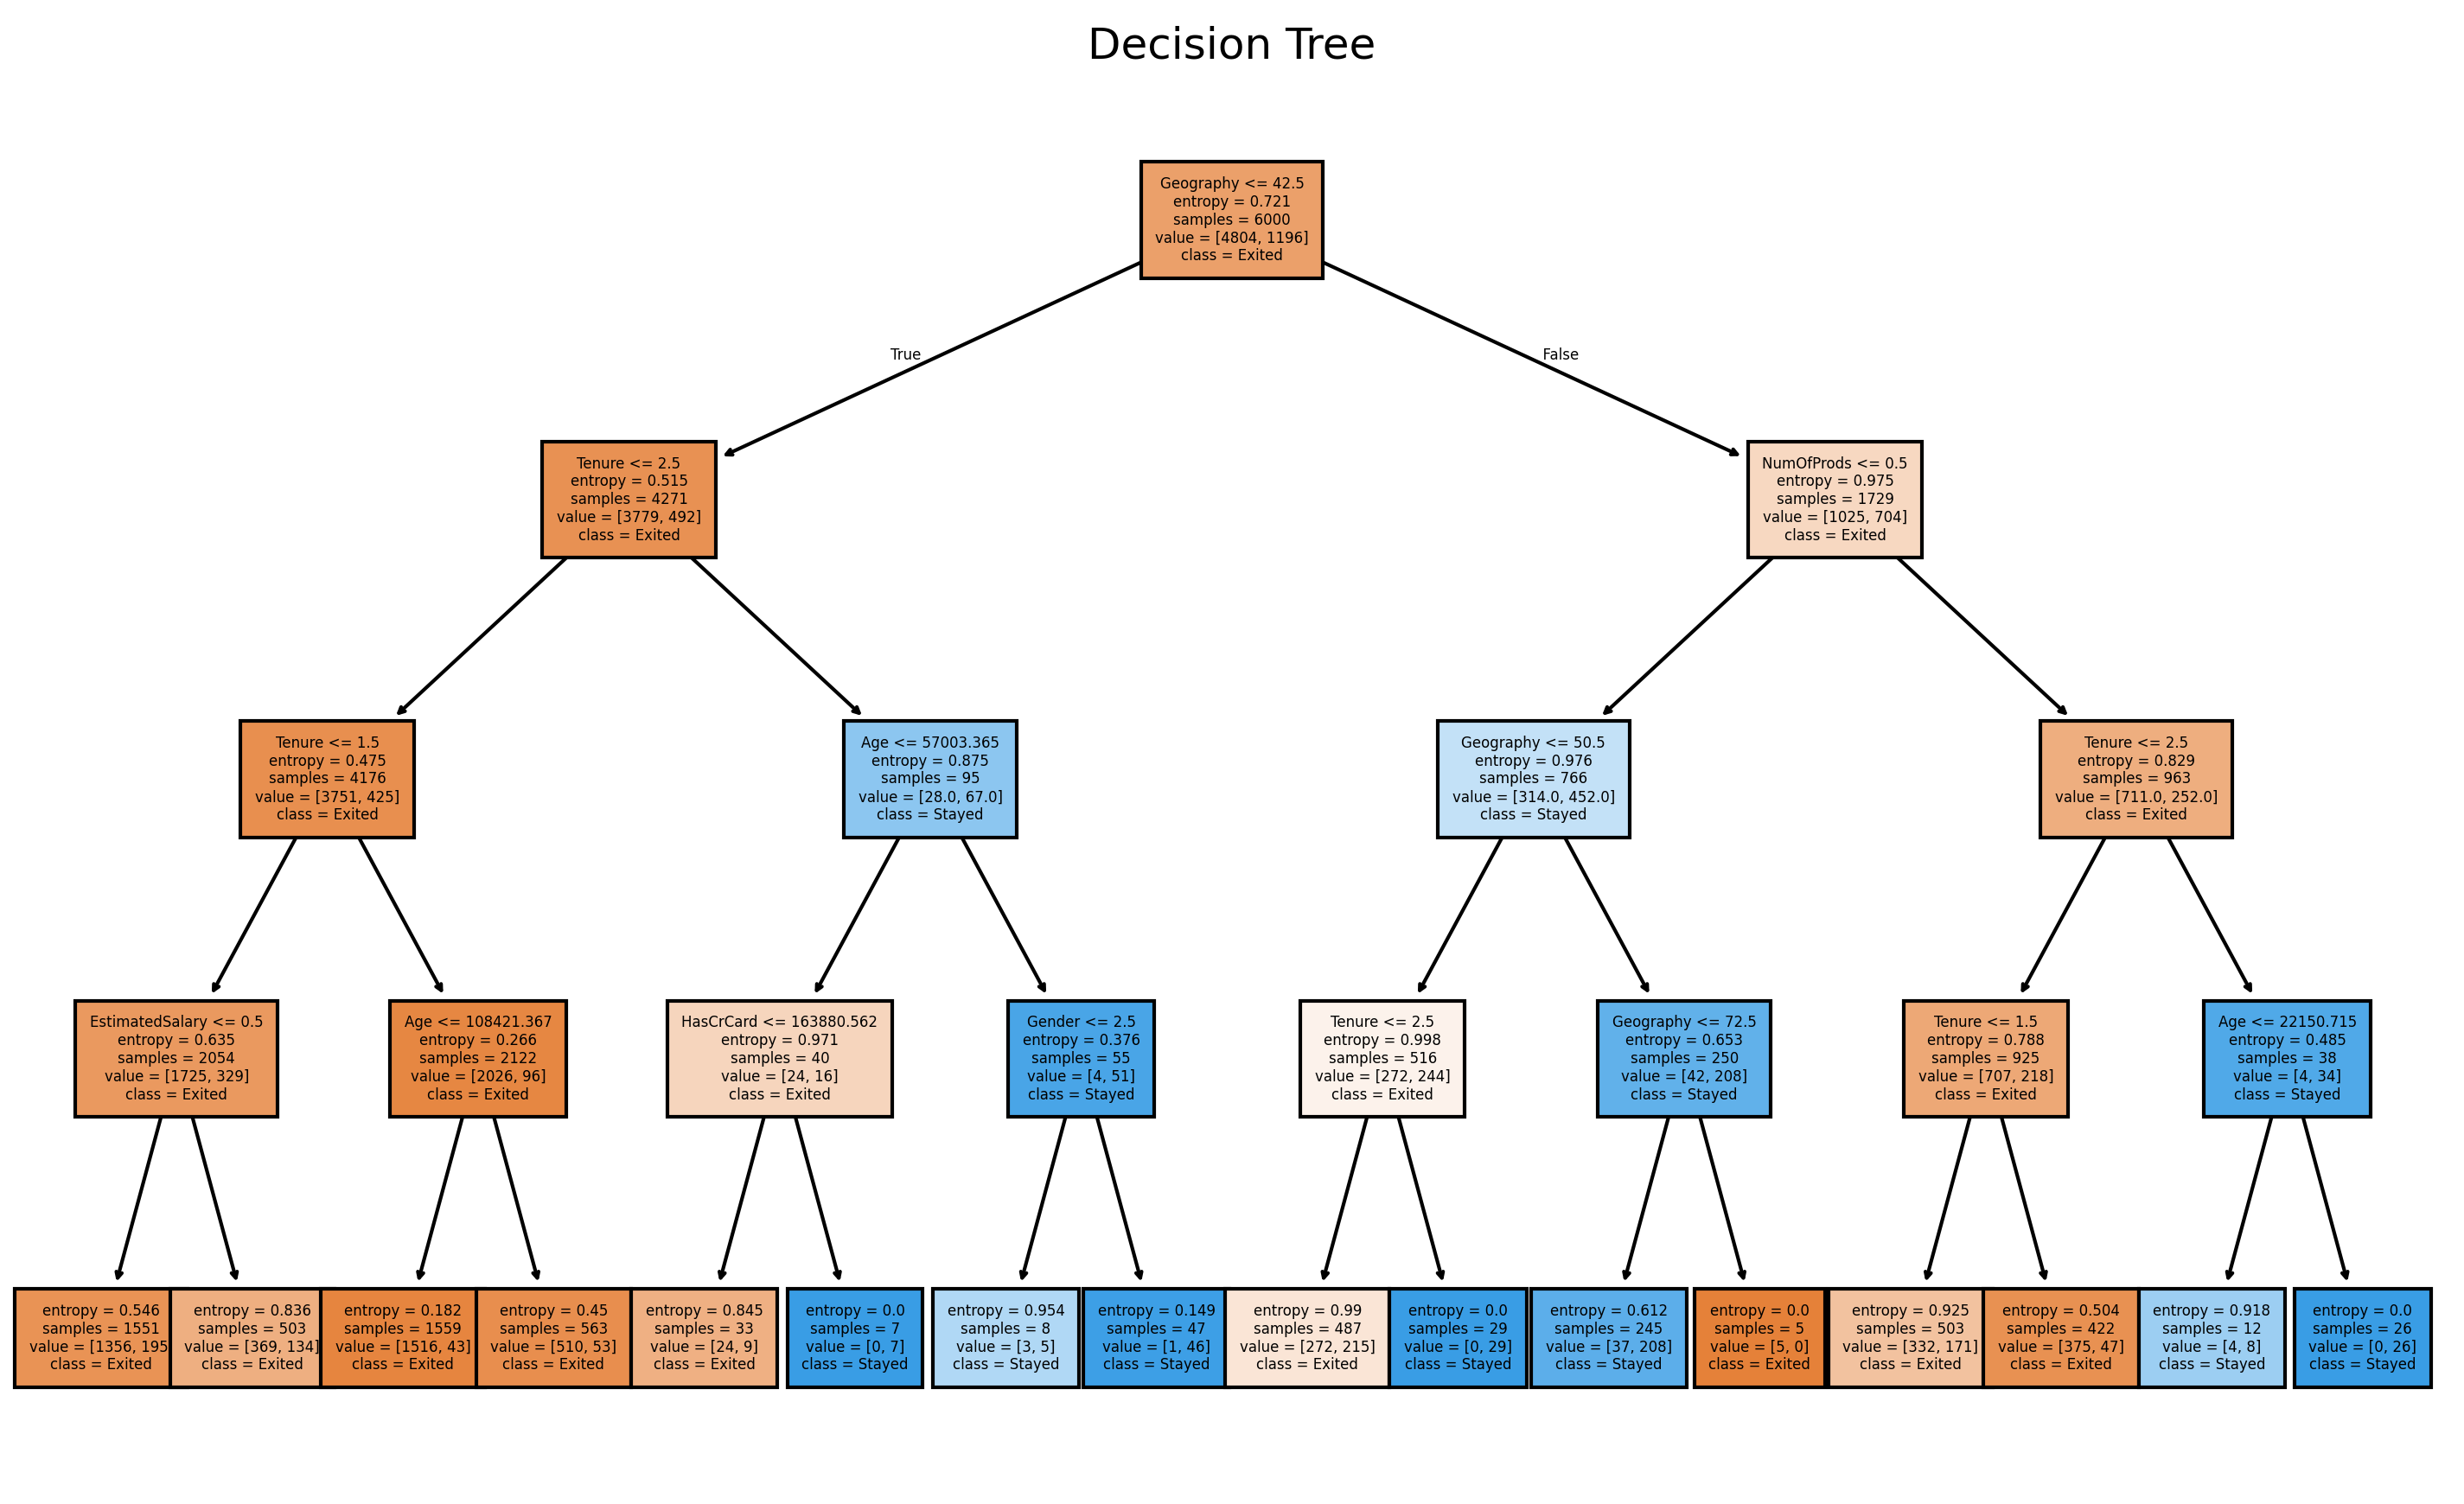

In [15]:
#### Plot Decision Tree
plt.figure(figsize=(12,7), dpi=300)
plot_tree(clf, feature_names=feature_cols, filled=True, class_names=["Exited", "Stayed"], fontsize=4)
plt.title("Decision Tree"); plt.show()